The following method uses LBFGS neuronal network to "smooth" the data coming from the sensors (correcting possible noise), and it also predicts the evaporation rate for a given input. We will start by taking random values of the sensors (simulation data) and demonstrating how lbfgs nn can predict new values with an acceptable mean squared error


# Simulation data

Simulation of data coming from sensors and fan. The name of variables match with the references in the input_data_reference file

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math
import sklearn
from random import *
import csv
import pandas as pd

## Real data

For now we have some data, but some it's missing.

Missing: f1, wm, t4

In [43]:
#read the data into list
dt=2
import csv
path = 'C:/Users/mitsy/OneDrive - Hanzehogeschool Groningen/master SSE/ESKA/Drying-process-code/test_version_1.csv'
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    h2 = [row[0] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    t2 = [row[1] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    h1 = [row[2] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    t1 = [row[3] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    h4 = [row[4] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    t3 = [row[5] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    af = [row[6] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    t5 = [row[7] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    h3 = [row[8] for row in reader]

In [44]:
del h2[0]
h2 = list(map(float,h2))
del t2[0]
t2 = list(map(float,t2))
del h1[0]
h1 = list(map(float,h1))
del t1[0]
t1 = list(map(float,t1))
del h4[0]
h4 = list(map(float,h4))
del t3[0]
t3 = list(map(float,t3))
del af[0]
af = list(map(float,af))
del t5[0]
t5 = list(map(float,t5))
del h3[0]
h3 = list(map(float,h3))

In [42]:
len(t5)

2765

In [56]:
er=np.empty((len(t5)))
for i in range(len(h3)): #evaporation rate, in ml/h. This is the Y value that we want to fit and predict
    # evaporation rate must be calculated to amount of water leaving the towel
    # for that the measurement h3 must be calibrated to weight of water
    er[i] = (h3[i]-h3[i-1])/dt  # evaporation rate is the difference between two timestamps


## Fake data

In [18]:
N = 50
dt_ = 2 

#  measurement have two seconds interval
# we need data from different time intervals if we are going to simulate them
# if we are going to use always 2 seconds there is no need for other time interval.

# temperature values are in degrees celsius
t1_ = np.linspace(20,20,N) # ambient temperature coming in
t2_ = np.linspace(40,60,N) #temperature coming out of the box
t3_ = np.linspace(60,80,N)
t4_ = np.linspace(70,100,N)
t5_ = np.linspace(80,95,N)
# humidity values in grams/m^3
h1_ = np.linspace(20,30,N)# absolute humidity in grams of water per cubic meter of air. Absolute humidity in the atmosphere ranges from near zero to roughly 30 grams per cubic metre when the air is saturated at 30 °C
h2_ = np.linspace(35,40,N)
h3_ = np.linspace(60,80,N)
h4_ = np.linspace(40,50,N)
af_ = np.linspace(5,20,N) # in liters per second
#evaporation rate
er_ = np.empty(N)
er_[0] = 0
f1_ = np.empty(N)
f1_[0] = 0
f2_ = np.empty(N)
f2_[0] = 0
wm_ = np.empty(N)
wm_[0] = 0
for i in range(1,N-1,1): #evaporation rate, in ml/h. This is the Y value that we want to fit and predict
    # evaporation rate must be calculated to amount of water leaving the towel
    # for that the measurement h3 must be calibrated to weight of water
    er_[i] = (h3_[i]-h3_[i-1]) / dt_ # evaporation rate is the difference between two timestamps
    f1_[i] = randint(0, 1) #0 is off and 1 is on
    f2_[i] = randint(0, 1)
    wm_[i] = randint(0, 1) #0 is 0 watts, 1 is 120 watts
    t1_[i] = 20
    

# MPLRegresor - LBFGS to predict er (evaporation rate)

We need to define what is going to be the X data and the Y data

The X data is composed by the data of the variables that affect the evaporation rate of the towel. This means, the data coming from the wattmeter, the temperature sensors and the fans. We need to build an array X that contains all this data. X is composed by wm, t1, t2, t3, t4, t5 and af. Y is composed by the evaporation rate values (er)

## MPLRegresor with fake data

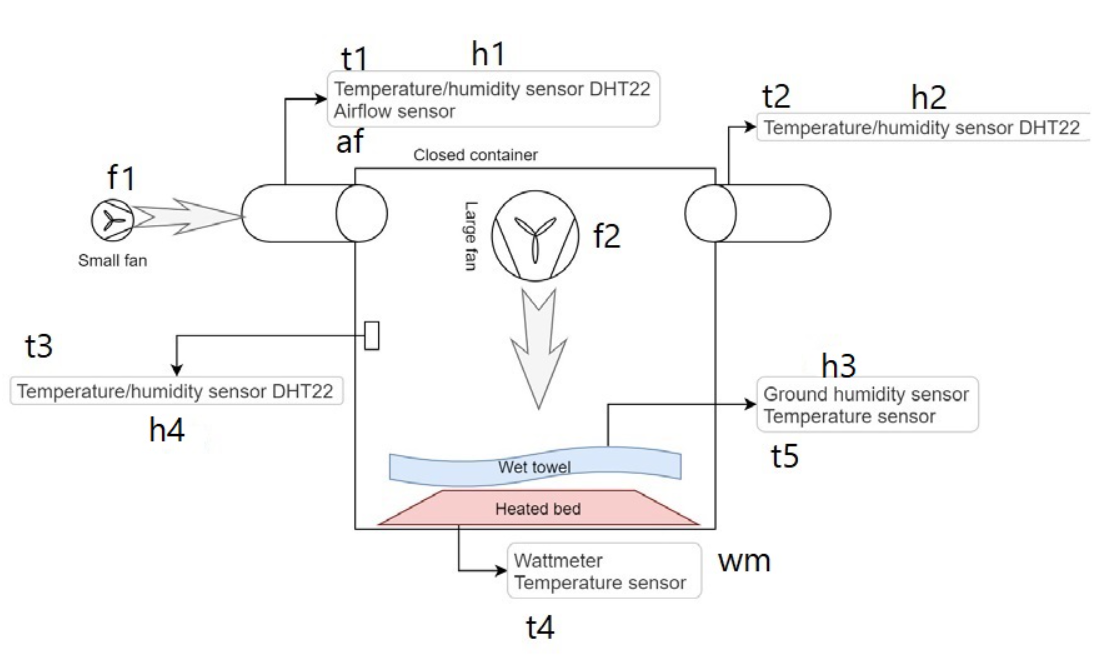

In [38]:
X = list(zip(t1_, h1_, t2_, h2_, t3_, t4_, h4_, t5_, h3_, af_, wm_))
Y = er_

In [39]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10,10,10),
                   random_state=1, max_iter=10000)
clf.fit(X, Y)
Y_predicted = clf.predict(X)
mean_squared_error(Y_predicted,Y) 

0.9465192476690237

In [26]:
x_val=np.linspace(0,len(Y),len(Y_predicted))


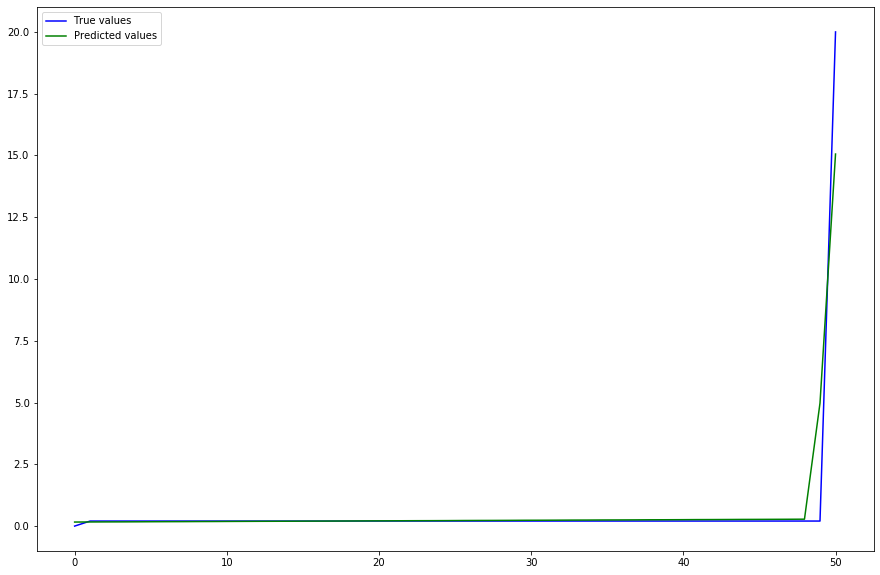

In [34]:
plt.figure(figsize=(15,10))
plt.plot(x_val,Y,'b',x_val,Y_predicted,'g')
plt.legend(('True values','Predicted values'))
plt.show()

## MPLRegresor with real data

For now we have some data, but some it's missing.

Missing: f1, wm, t4

In [63]:
X = list(zip(t1, h1, t2, h2, t3, h4, t5, h3, af))
Y = er

In [64]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10,10,10),
                   random_state=1, max_iter=1000)
clf.fit(X, Y)
Y_predicted = clf.predict(X)
mean_squared_error(Y_predicted,Y)

0.019485097546142485

In [62]:
Y[1000]

0.0

In [61]:
Y_predicted[1000]

-0.11579504607807511

In [49]:
x_val=np.linspace(0,len(t1),len(t1))

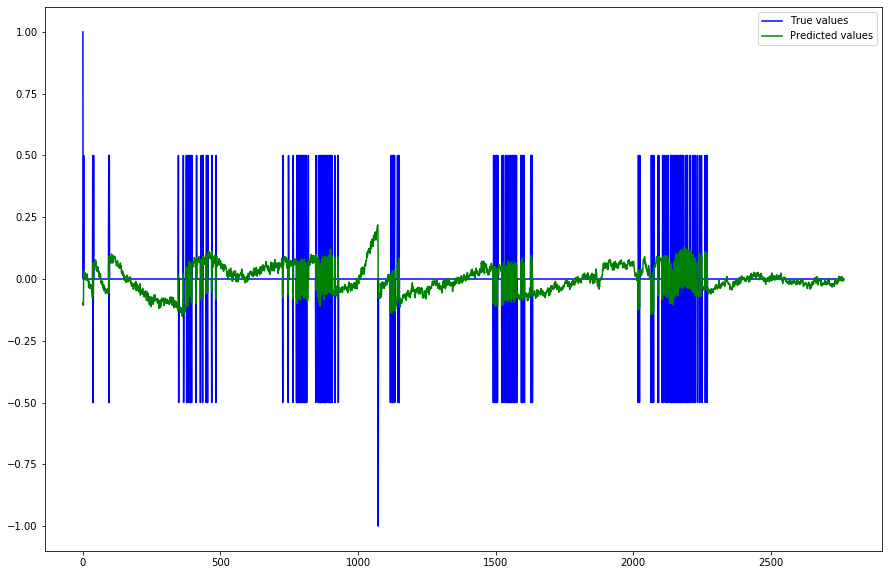

In [65]:
plt.figure(figsize=(15,10))
plt.plot(x_val,Y,'b',x_val,Y_predicted,'g')
plt.legend(('True values','Predicted values'))
plt.show()

for alpha=1e-1 and hidden_layer_sizes=(10,10,10) we obatain a prediction with error 5.47874738450778e-07

In [22]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10,10,10),
                   random_state=1, max_iter=1000)
clf.fit(X, Y)
Y_predicted = clf.predict(X)
mean_squared_error(Y_predicted,Y)

0.06448557240598185

In [23]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10,10),
                   random_state=1, max_iter=1000)
clf.fit(X, Y)
Y_predicted = clf.predict(X)
mean_squared_error(Y_predicted,Y)

0.06097645410408309

In [24]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=7,
                   random_state=1, max_iter=1000)
clf.fit(X, Y)
Y_predicted = clf.predict(X)
mean_squared_error(Y_predicted,Y)

0.06401864570005383

In [25]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-8, hidden_layer_sizes=7,
                   random_state=1, max_iter=1000)
clf.fit(X, Y)
Y_predicted = clf.predict(X)
mean_squared_error(Y_predicted,Y)

0.07392450266113726

so far a hidden layer size of 7 with regularization term alpha of 1e-8 has the lowest mean square error

In [26]:
#Check through time
#compare predicted values with new values
#try to find best input for bigger er
#variate hidden_layer_sizes and alpha

## New data 30-06-2020

In [15]:
import datetime
import time

In [16]:
#covert ms since epoch
time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(1593598817.3554/1000.0))

'1970-01-19 10:39:58'

In [19]:
#read the data into list
dt=2
path = 'C:/Users/mitsy/OneDrive - Hanzehogeschool Groningen/master SSE/ESKA/Drying-process-code/01-07-2020-first.csv'
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    time = [row[0] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    f1 = [row[1] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    f2 = [row[2] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    t1 = [row[3] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    h1 = [row[4] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    t2 = [row[5] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    h2 = [row[6] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    t3 = [row[7] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    h4 = [row[8] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    af = [row[9] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    t4 = [row[10] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    wm = [row[11] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    t5 = [row[12] for row in reader]
with open(path) as csvfile:
    reader = csv.reader(csvfile)
    h3 = [row[13] for row in reader]

In [21]:
del time[0]
time = list(map(float,time))
del f1[0]
f1 = list(map(float,f1))
del f2[0]
f2 = list(map(float,f2))
del t1[0]
t1 = list(map(float,t1))
del h1[0]
h1 = list(map(float,h1))
del t2[0]
t2 = list(map(float,t2))
del h2[0]
h2 = list(map(float,h2))
del t3[0]
t3 = list(map(float,t3))
del h4[0]
h4 = list(map(float,h4))
del af[0]
af = list(map(float,af))
del t4[0]
t4 = list(map(float,t4))
del wm[0]
wm = list(map(float,wm))
del t5[0]
t5 = list(map(float,t5))
del h3[0]
h3 = list(map(float,h3))